In [1]:
# Add the package to the environment
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl`
Precompiling project...
   2068.8 ms  ✓ YieldFactorModels
  1 dependency successfully precompiled in 4 seconds. 418 already precompiled.


In [2]:
# Import the package and required dependencies
using Revise
using YieldFactorModels
using LinearAlgebra
using ForwardDiff
using Random

Random.seed!(123)  # For reproducibility


# NOTE: `export VAR=...` is a shell command and is not valid Julia syntax in a code cell.
# For runtime settings that can be changed from within Julia use `ENV` or library APIs.
# Set BLAS / native libraries thread knobs where possible:
ENV["OPENBLAS_NUM_THREADS"] = "1"
ENV["OMP_NUM_THREADS"] = "1"
ENV["MKL_NUM_THREADS"] = "1"  # If MKL.jl is used, prefer MKL.set_num_threads(1)
# Also set BLAS threads from Julia (affects LinearAlgebra.BLAS):
LinearAlgebra.BLAS.set_num_threads(1)


cd("..")

In [5]:
# set pwd one level back 

YieldFactorModels.run("6", 231, 12, false, "1C", Float64; window_type = "expanding",  max_group_iters=10, run_optimization=true, reestimate=false )
# vcat(fill("1", 22), fill("2", 12) )

Default param groups assigned.
The param groups are : ["1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1"]
✓ Found valid initial parameters after 0 perturbations

┌ Warning: Static parameters for 1C not found, using default initialization.
└ @ YieldFactorModels ~/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/src/YieldFactorModels.jl:117




Starting block-coordinate optimization

--- Starting point 1/1 ---
Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     6.929449e+06     6.337113e+07
 * time: 0.00020599365234375
   100     4.204696e+04     6.493511e+04
 * time: 1.4748380184173584
   200    -1.044035e+03     7.321521e+02
 * time: 1.9421758651733398
   300    -1.699093e+03     4.509271e+01
 * time: 2.4633870124816895
   400    -1.796545e+03     4.221867e+00
 * time: 3.0684289932250977
   500    -1.872290e+03     6.488527e+00
 * time: 3.561708927154541
Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0    -1.930339e+03     5.079553e+03
 * time: 0.000209808349609375
   100    -2.095131e+03     3.237925e+01
 * time: 0.5940179824829102
   200    -3.688640e+03     6.909954e+01
 * time: 1.0927608013153076
   300    -4.697694e+03     7.503489e+01
 * time: 1.5830159187316895
   400    -4.888209e+03     8.157309e+00
 * time: 2.0853238105773926


YieldFactorModels.DNSModel{Float64, Float64}(YieldFactorModels.KalmanBaseModel{Float64, Float64}([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0  …  30.0, 36.0, 48.0, 60.0, 72.0, 84.0, 96.0, 108.0, 120.0, 180.0], 24, 3, 1, [1.0 0.9741390909114751 0.025411160892502838; 1.0 0.9491660270912412 0.04908134189315727; … ; 1.0 0.15804229002119843 0.15623510616373135; 1.0 0.10554416998425567 0.1054673448181479], [4.360475261271164, 0.032296423384453585, -0.8715462710629241], [0.9729794974698751 0.006873165116568142 -0.002559653133245526; -0.013384477451593832 0.9358000875868977 0.06342721669011434; 0.010274726285729934 0.04432347327141434 0.9162803758223568], [0.192567582623994, -0.012862993911132338, -0.05433483523081133], [-3.1551216883902438], [0.07749155388296523 -0.06609811490316748 0.0389202670157625; -0.06609811490316748 0.10745645359364972 -0.016156222284533988; 0.0389202670157625 -0.016156222284533988 0.6126229226044909], [0.005976176090248169 0.0 … 0.0 0.0; 0.0 0.005976176090248169

In [42]:
using CairoMakie
using DelimitedFiles

(480

, 24)
(480, 4)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/4JW9B/src/scenes.jl:264


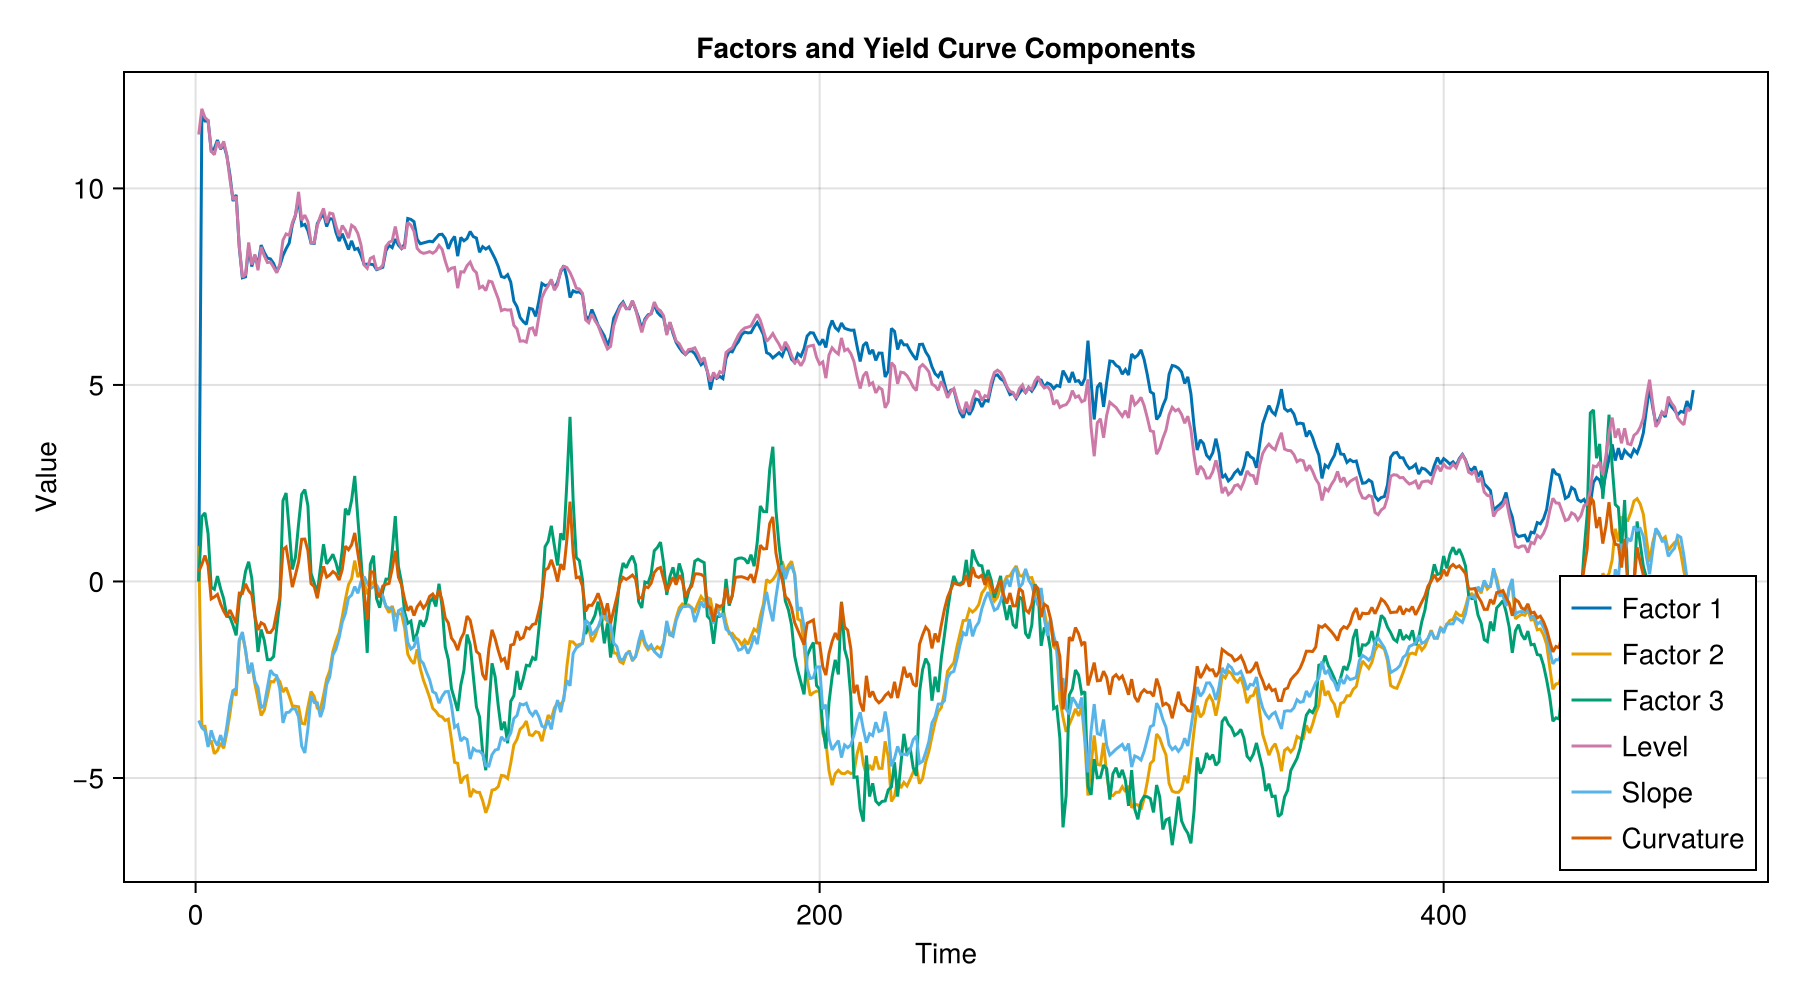

In [55]:
model_name = "1C"
# read /Users/siccokooiker/surfdrive/JuliaProjects/YieldFactorModels.jl/results/SD-NS/SD-NS__thread_id__6__factors_filtered_outofsample.csv
filtered_data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/thread_id__6/$(model_name)/$(model_name)__thread_id__6__factors_filtered_outofsample.csv", ',')
# /Users/siccokooiker/surfdrive/JuliaProjects/YieldFactorModels.jl/data/thread_id__6__data.csv
data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/data/thread_id__6__data.csv", ',')
data = data'
# print shape
println(size(data))
println(size(filtered_data))

# plot first 3 factors over time using CairoMakie

f = Figure(resolution = (900, 500))
ax = Axis(f[1, 1], xlabel = "Time", ylabel = "Value", title = "Factors and Yield Curve Components")
lines!(ax, filtered_data[:, 1], label = "Factor 1")
lines!(ax, filtered_data[:, 2], label = "Factor 2")
lines!(ax, filtered_data[:, 3], label = "Factor 3")

# plot level, slope and curvature from data
# level is last column
lines!(ax, data[1:end-1, end], label = "Level")
# slope is difference between first and last column
lines!(ax, data[1:end-1, 1] .- data[1:end-1, end], label = "Slope")
# curvature: 2 x 14th column - (1st + last)
lines!(ax, 2 .* data[1:end-1, 14] .- (data[1:end-1, 1] .+ data[1:end-1, end]), label = "Curvature")

axislegend(ax, position = :rb)
f

(480, 24)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/4JW9B/src/scenes.jl:264


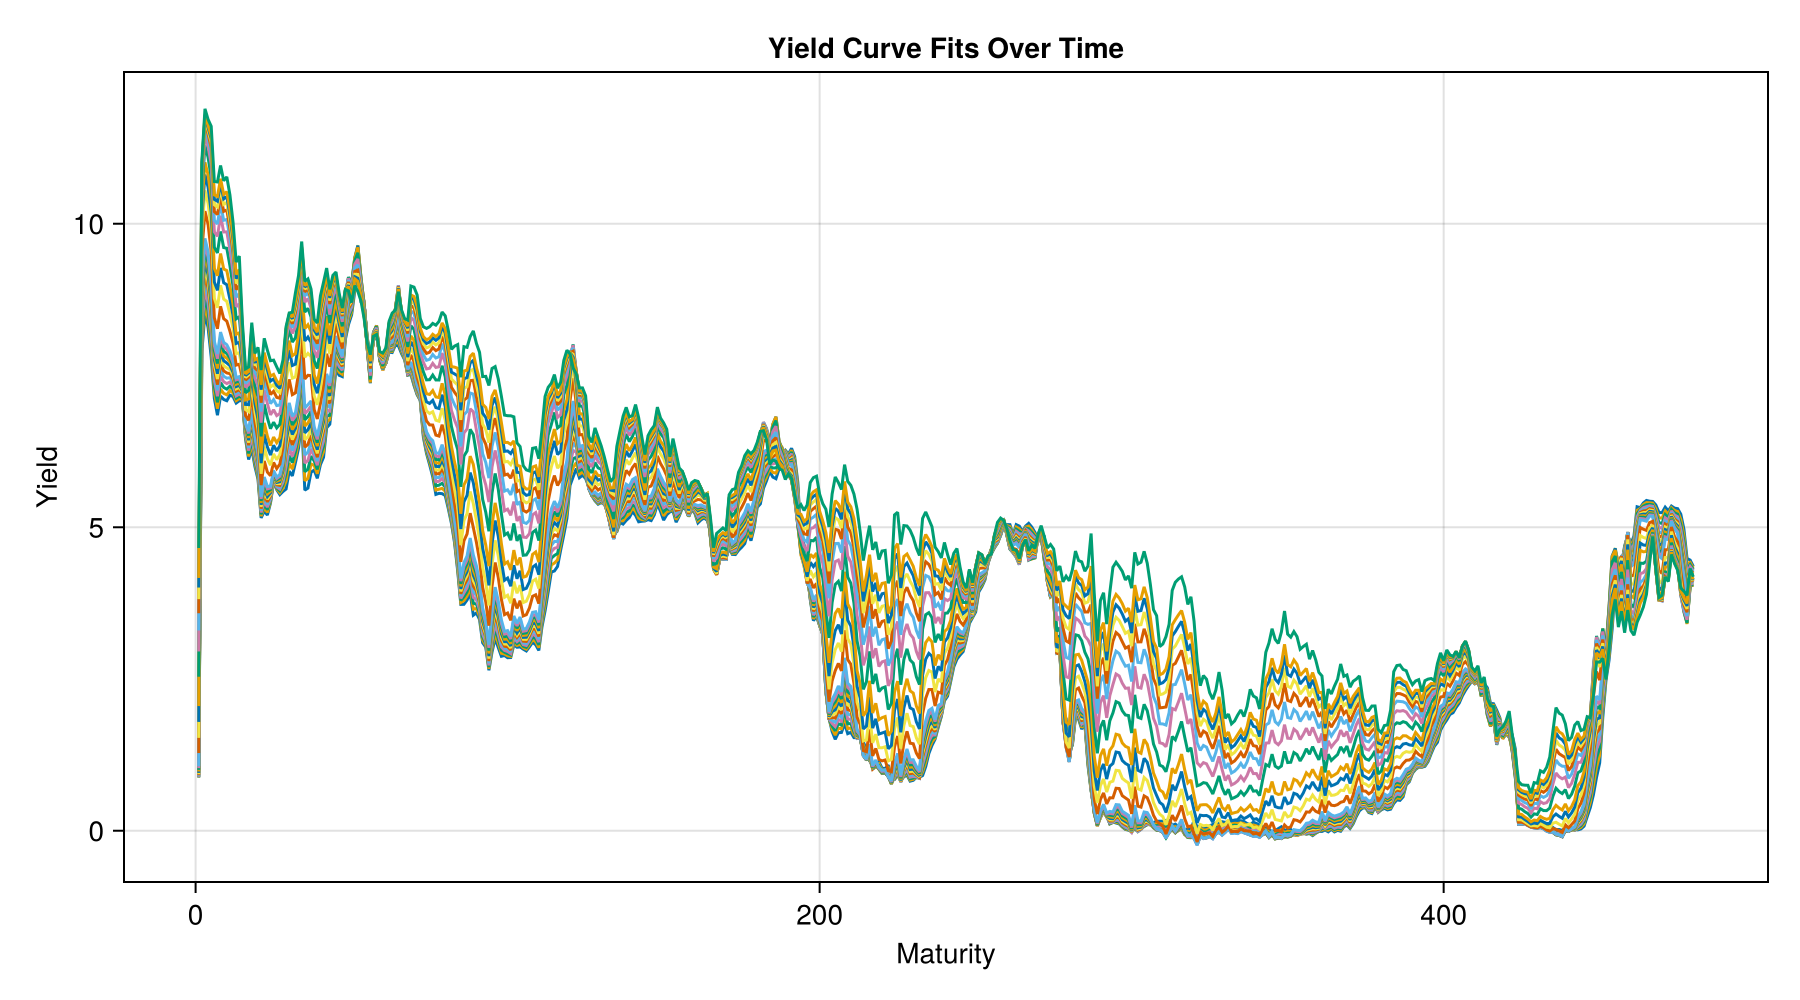

In [47]:
# plot predictions /Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/NS/NS__thread_id__6__fit_filtered_outofsample.csv
fit_data = readdlm("/Users/siccokooiker/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/surfdrive/JuliaProjects/YieldFactorModels.jl/results/thread_id__6/$(model_name)/$(model_name)__thread_id__6__fit_filtered_outofsample.csv", ',')

# size is (480, 24)
println(size(fit_data))

# plot all 24 lines in one plot 
f2 = Figure(resolution = (900, 500))
ax2 = Axis(f2[1, 1], xlabel = "Maturity", ylabel = "Yield", title = "Yield Curve Fits Over Time")
for i in 1:size(fit_data, 2)
    lines!(ax2, 1:size(fit_data, 1), fit_data[:, i])
end
f2
